# Text Analysis of Cluster 8


### Imports

In [ ]:
import sys
!{sys.executable} -m pip install umap-learn

In [ ]:
import sys
!{sys.executable} -m pip install gensim

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import umap

In [2]:
from sklearn.manifold import TSNE

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark import SparkContext

import time 
from time import sleep

sc = SparkContext()
sc

<SparkContext master=yarn appName=pyspark-shell>

In [4]:
spark = SparkSession \
 .builder \
 .appName("Python Spark SQL basic example") \
 .config("spark.some.config.option", "some-value") \
 .getOrCreate()

In [5]:
from pyspark.sql import functions as F
from pyspark.sql.types import StringType,ArrayType

In [ ]:
# load samples from s3 --- document id, specter emebdding, pca features, k-means cluster assignment, Tsne x-coord, TSNE y Coord

In [6]:
sample_seed_1_cluser_assinged = spark.read.parquet("s3://hids511final/corid_embedding_pca_200_sample_seed_01_1_KMEANS_PRED_DISTINCT_TSNE.parquet")


In [7]:
sample_seed_1_cluser_assinged.sort("_c0", ascending=True).show()

+--------+--------------------+--------------------+--------+----------+-------------------+-------------------+-------+--------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|                  0|                  1|cluster|_c0_TSNE|
+--------+--------------------+--------------------+--------+----------+-------------------+-------------------+-------+--------+
|0002xs6a|[-0.1964119076728...|[-11.574325181804...|0002xs6a|         5| 24.209314346313477|-22.192285537719727|      5|0002xs6a|
|000ahtxm|[-2.9770514965057...|[45.1680184838206...|000ahtxm|        10| -19.15400505065918|  7.697844505310059|     10|000ahtxm|
|005k8824|[-1.4750411510467...|[-28.270005934630...|005k8824|        12| 41.154930114746094| -19.80437469482422|     12|005k8824|
|006nkkvs|[-1.6833999156951...|[-29.006284880778...|006nkkvs|         5| 31.003070831298828| -22.15633773803711|      5|006nkkvs|
|007ks0wi|[1.89062261581420...|[-18.201123070057...|007ks0wi|         5|  30.7440109252929

In [ ]:
## load metadata from s3

In [8]:
metadata = spark.read.csv('s3://ai2-semanticscholar-cord-19/2021-04-19/metadata.csv/',header = True)

In [9]:
metadata.columns

['cord_uid',
 'sha',
 'source_x',
 'title',
 'doi',
 'pmcid',
 'pubmed_id',
 'license',
 'abstract',
 'publish_time',
 'authors',
 'journal',
 'mag_id',
 'who_covidence_id',
 'arxiv_id',
 'pdf_json_files',
 'pmc_json_files',
 'url',
 's2_id']

In [10]:
metadata[['cord_uid','title','abstract','authors','journal','publish_time']].show()

+--------+--------------------+--------------------+--------------------+--------------------+------------+
|cord_uid|               title|            abstract|             authors|             journal|publish_time|
+--------+--------------------+--------------------+--------------------+--------------------+------------+
|ug7v899j|Clinical features...|OBJECTIVE: This r...|Madani, Tariq A; ...|      BMC Infect Dis|  2001-07-04|
|02tnwd4m|Nitric oxide: a p...|Inflammatory dise...|Vliet, Albert van...|          Respir Res|  2000-08-15|
|ejv2xln0|Surfactant protei...|Surfactant protei...|     Crouch, Erika C|          Respir Res|  2000-08-25|
|2b73a28n|Role of endotheli...|Endothelin-1 (ET-...|Fagan, Karen A; M...|          Respir Res|  2001-02-22|
|9785vg6d|Gene expression i...|Respiratory syncy...|Domachowske, Jose...|          Respir Res|  2001-05-11|
|zjufx4fo|Sequence requirem...|Nidovirus subgeno...|Pasternak, Alexan...|    The EMBO Journal|  2001-12-17|
|5yhe786e|Debate: Transfusi.

In [11]:
# join sample data with metadata.csv  -- Specter Embedding and Text of title and abstract in the same Dataframe
## This allows for filtering the plot on crtiera of interest -- publication date, authors, journal ,etc
sample_seed_1_cluser_assinged_metadata= sample_seed_1_cluser_assinged.join(metadata[['cord_uid','title','abstract','authors','journal','publish_time']],
                                                   sample_seed_1_cluser_assinged["_c0"] == metadata["cord_uid"],"left")




In [12]:
sample_seed_1_cluser_assinged_metadata.show()

+--------+--------------------+--------------------+--------+----------+-------------------+--------------------+-------+--------+--------+--------------------+--------------------+--------------------+--------------------+------------+
|     _c0|           EMBEDDING|        pca_features|_c0_pred|prediction|                  0|                   1|cluster|_c0_TSNE|cord_uid|               title|            abstract|             authors|             journal|publish_time|
+--------+--------------------+--------------------+--------+----------+-------------------+--------------------+-------+--------+--------+--------------------+--------------------+--------------------+--------------------+------------+
|00a19z5i|[-4.0260972976684...|[50.1645298208696...|00a19z5i|        28| 11.712336540222168|   45.62245559692383|     28|00a19z5i|00a19z5i|Testing the modul...|The N-terminal re...|Teterina, Natalya...|            Virology|  2006-01-20|
|03er0xjy|[2.24352216720581...|[30.0484083110016...|

### From TSNE sample -- 

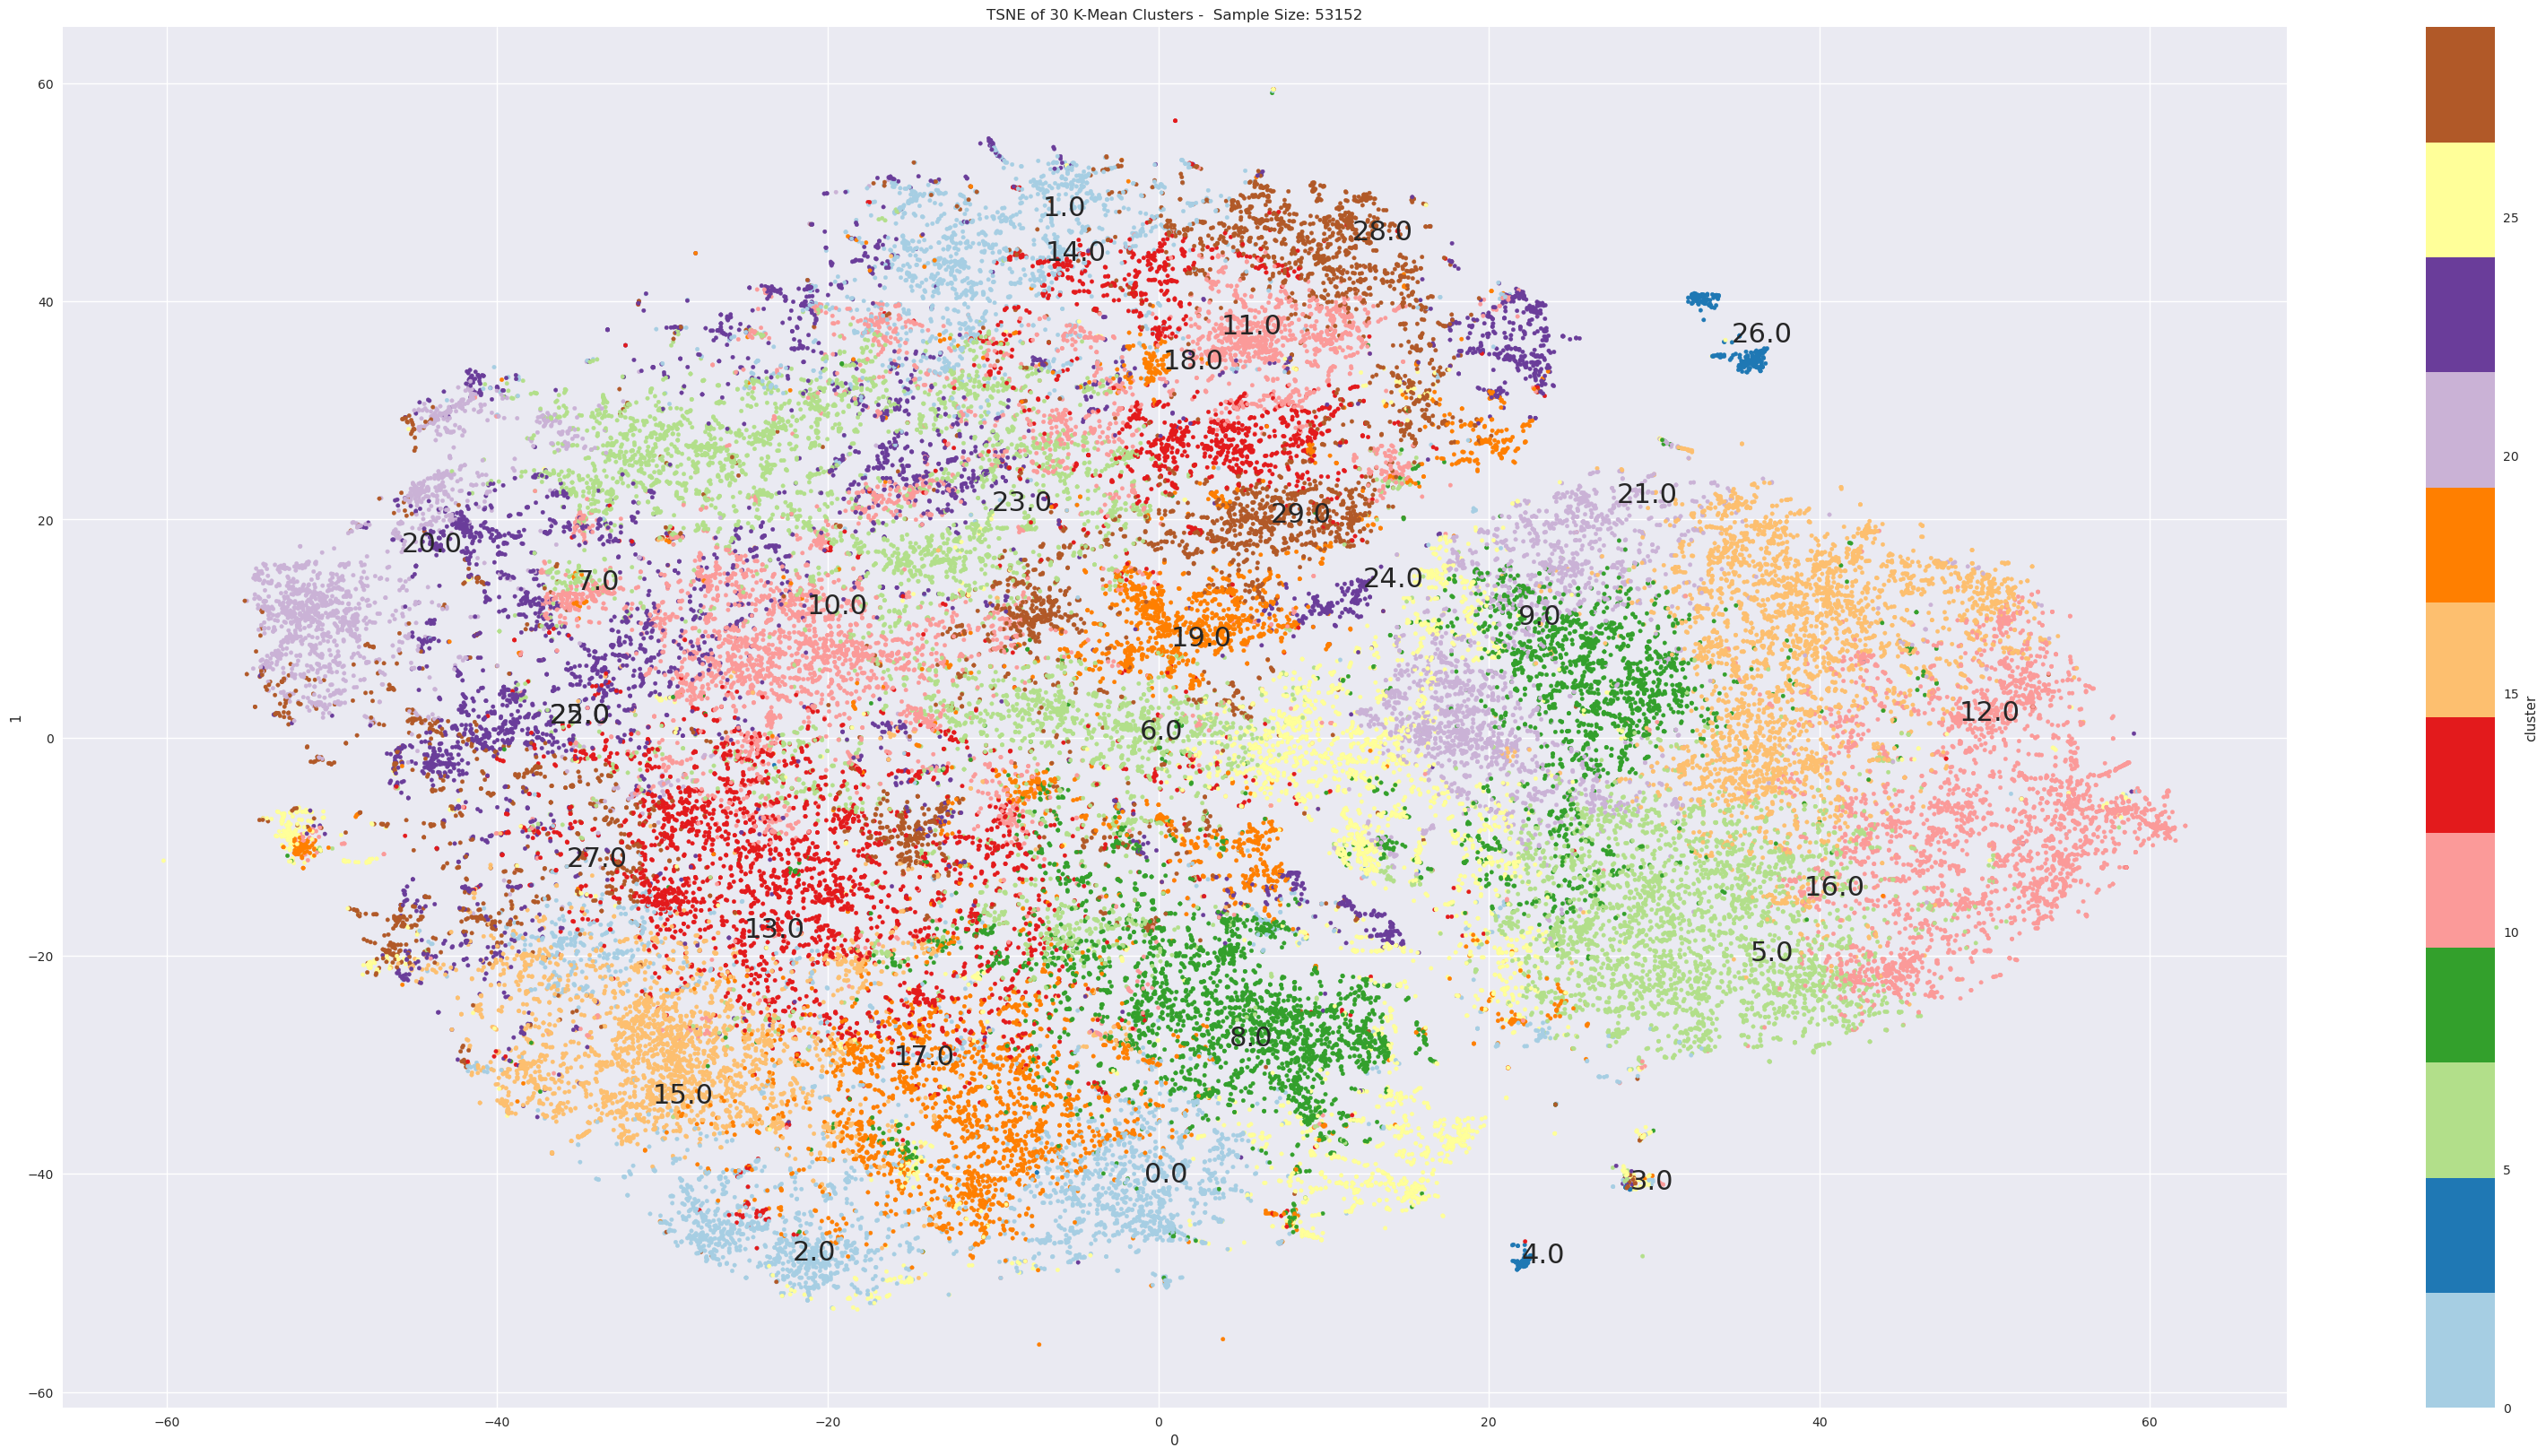

In [40]:

#for cmap in c_map_opt:

ax = TSNE_2d.plot.scatter(x=0,y=1,c='cluster', cmap='Paired', s=10,figsize=(40,20),title = 'TSNE of {} K-Mean Clusters -  Sample Size: {}'.format(len(TSNE_2d.groupby('cluster').first()),len(X_embedded)))


for i, txt in enumerate(TSNE_2d.groupby('cluster').first().reset_index().values):
    ax.annotate(txt[0], (txt[1], txt[2]),fontsize=22)
    
plt.show()
plt.close()

#### Which clusters had the most publications in 2021? or (Of papers published in 2021, what is their distirbution across clusters)

In [13]:
sample_seed_1_cluser_assinged_metadata.distinct().filter(
    sample_seed_1_cluser_assinged_metadata.publish_time.contains('2021')
).groupBy("prediction").count().sort('count',ascending=False).show()

+----------+-----+
|prediction|count|
+----------+-----+
|        15|  830|
|        10|  763|
|        12|  716|
|        13|  672|
|         8|  670|
|        17|  634|
|         5|  579|
|        16|  571|
|         6|  541|
|         2|  520|
|        25|  507|
|        11|  444|
|        21|  392|
|        26|  374|
|         7|  369|
|        19|  350|
|         9|  333|
|         0|  307|
|        27|  301|
|        23|  281|
+----------+-----+
only showing top 20 rows



#### Grab top 10 clusters with the most publications in 2021

In [14]:
clusters_2021 = sample_seed_1_cluser_assinged_metadata.distinct().filter(
    sample_seed_1_cluser_assinged_metadata.publish_time.contains('2021')
).groupBy("prediction").count().sort('count',ascending=False)[['prediction']].take(10)

clusters_2021_l = [i['prediction'] for i in clusters_2021]

In [26]:
clusters_2021_l 

[15, 10, 12, 13, 8, 17, 5, 16, 6, 2]

#### Filter TSNE coordiantes for top ten clusters

In [15]:
sample_seed_1_cluser_assinged_metadata[['_c0','EMBEDDING','prediction','0','1']].filter(
    sample_seed_1_cluser_assinged_metadata.prediction.isin(clusters_2021_l)).show()

+--------+--------------------+----------+-------------------+--------------------+
|     _c0|           EMBEDDING|prediction|                  0|                   1|
+--------+--------------------+----------+-------------------+--------------------+
|06ol4igi|[1.53384220600128...|        15|-30.610660552978516| -33.495887756347656|
|08lwff2x|[-2.4967875480651...|         6|-1.1289808750152588|-0.16880646347999573|
|0vybc2gq|[0.37723752856254...|        16|  39.08435821533203| -14.417068481445312|
|13sr3wey|[-4.7930393218994...|        13| -25.07196617126465|  -18.31549072265625|
|18dkbyh0|[0.35320791602134...|        12|  48.45599365234375|  1.6070688962936401|
|28p207s7|[-5.5626549720764...|        15| -2.883262872695923| -27.010852813720703|
|2dt758qj|[-2.3788766860961...|        10| -21.29029655456543|  11.336523056030273|
|2sptdcbj|[3.07114315032959...|        12| 46.968448638916016| -15.324485778808594|
|2uvfgr4c|[0.68845546245574...|        16|  40.12653350830078| -2.3498730659

In [16]:
sample_seed_1_cluser_assinged_metadata_top10_2021= sample_seed_1_cluser_assinged_metadata[['_c0','EMBEDDING','prediction','0','1']].filter(
    sample_seed_1_cluser_assinged_metadata.prediction.isin(clusters_2021_l))

#### Plot top ten TSNE

In [17]:
c_map_opt = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

TSNE_2d = sample_seed_1_cluser_assinged_metadata_top10_2021[['0','1','prediction']].toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


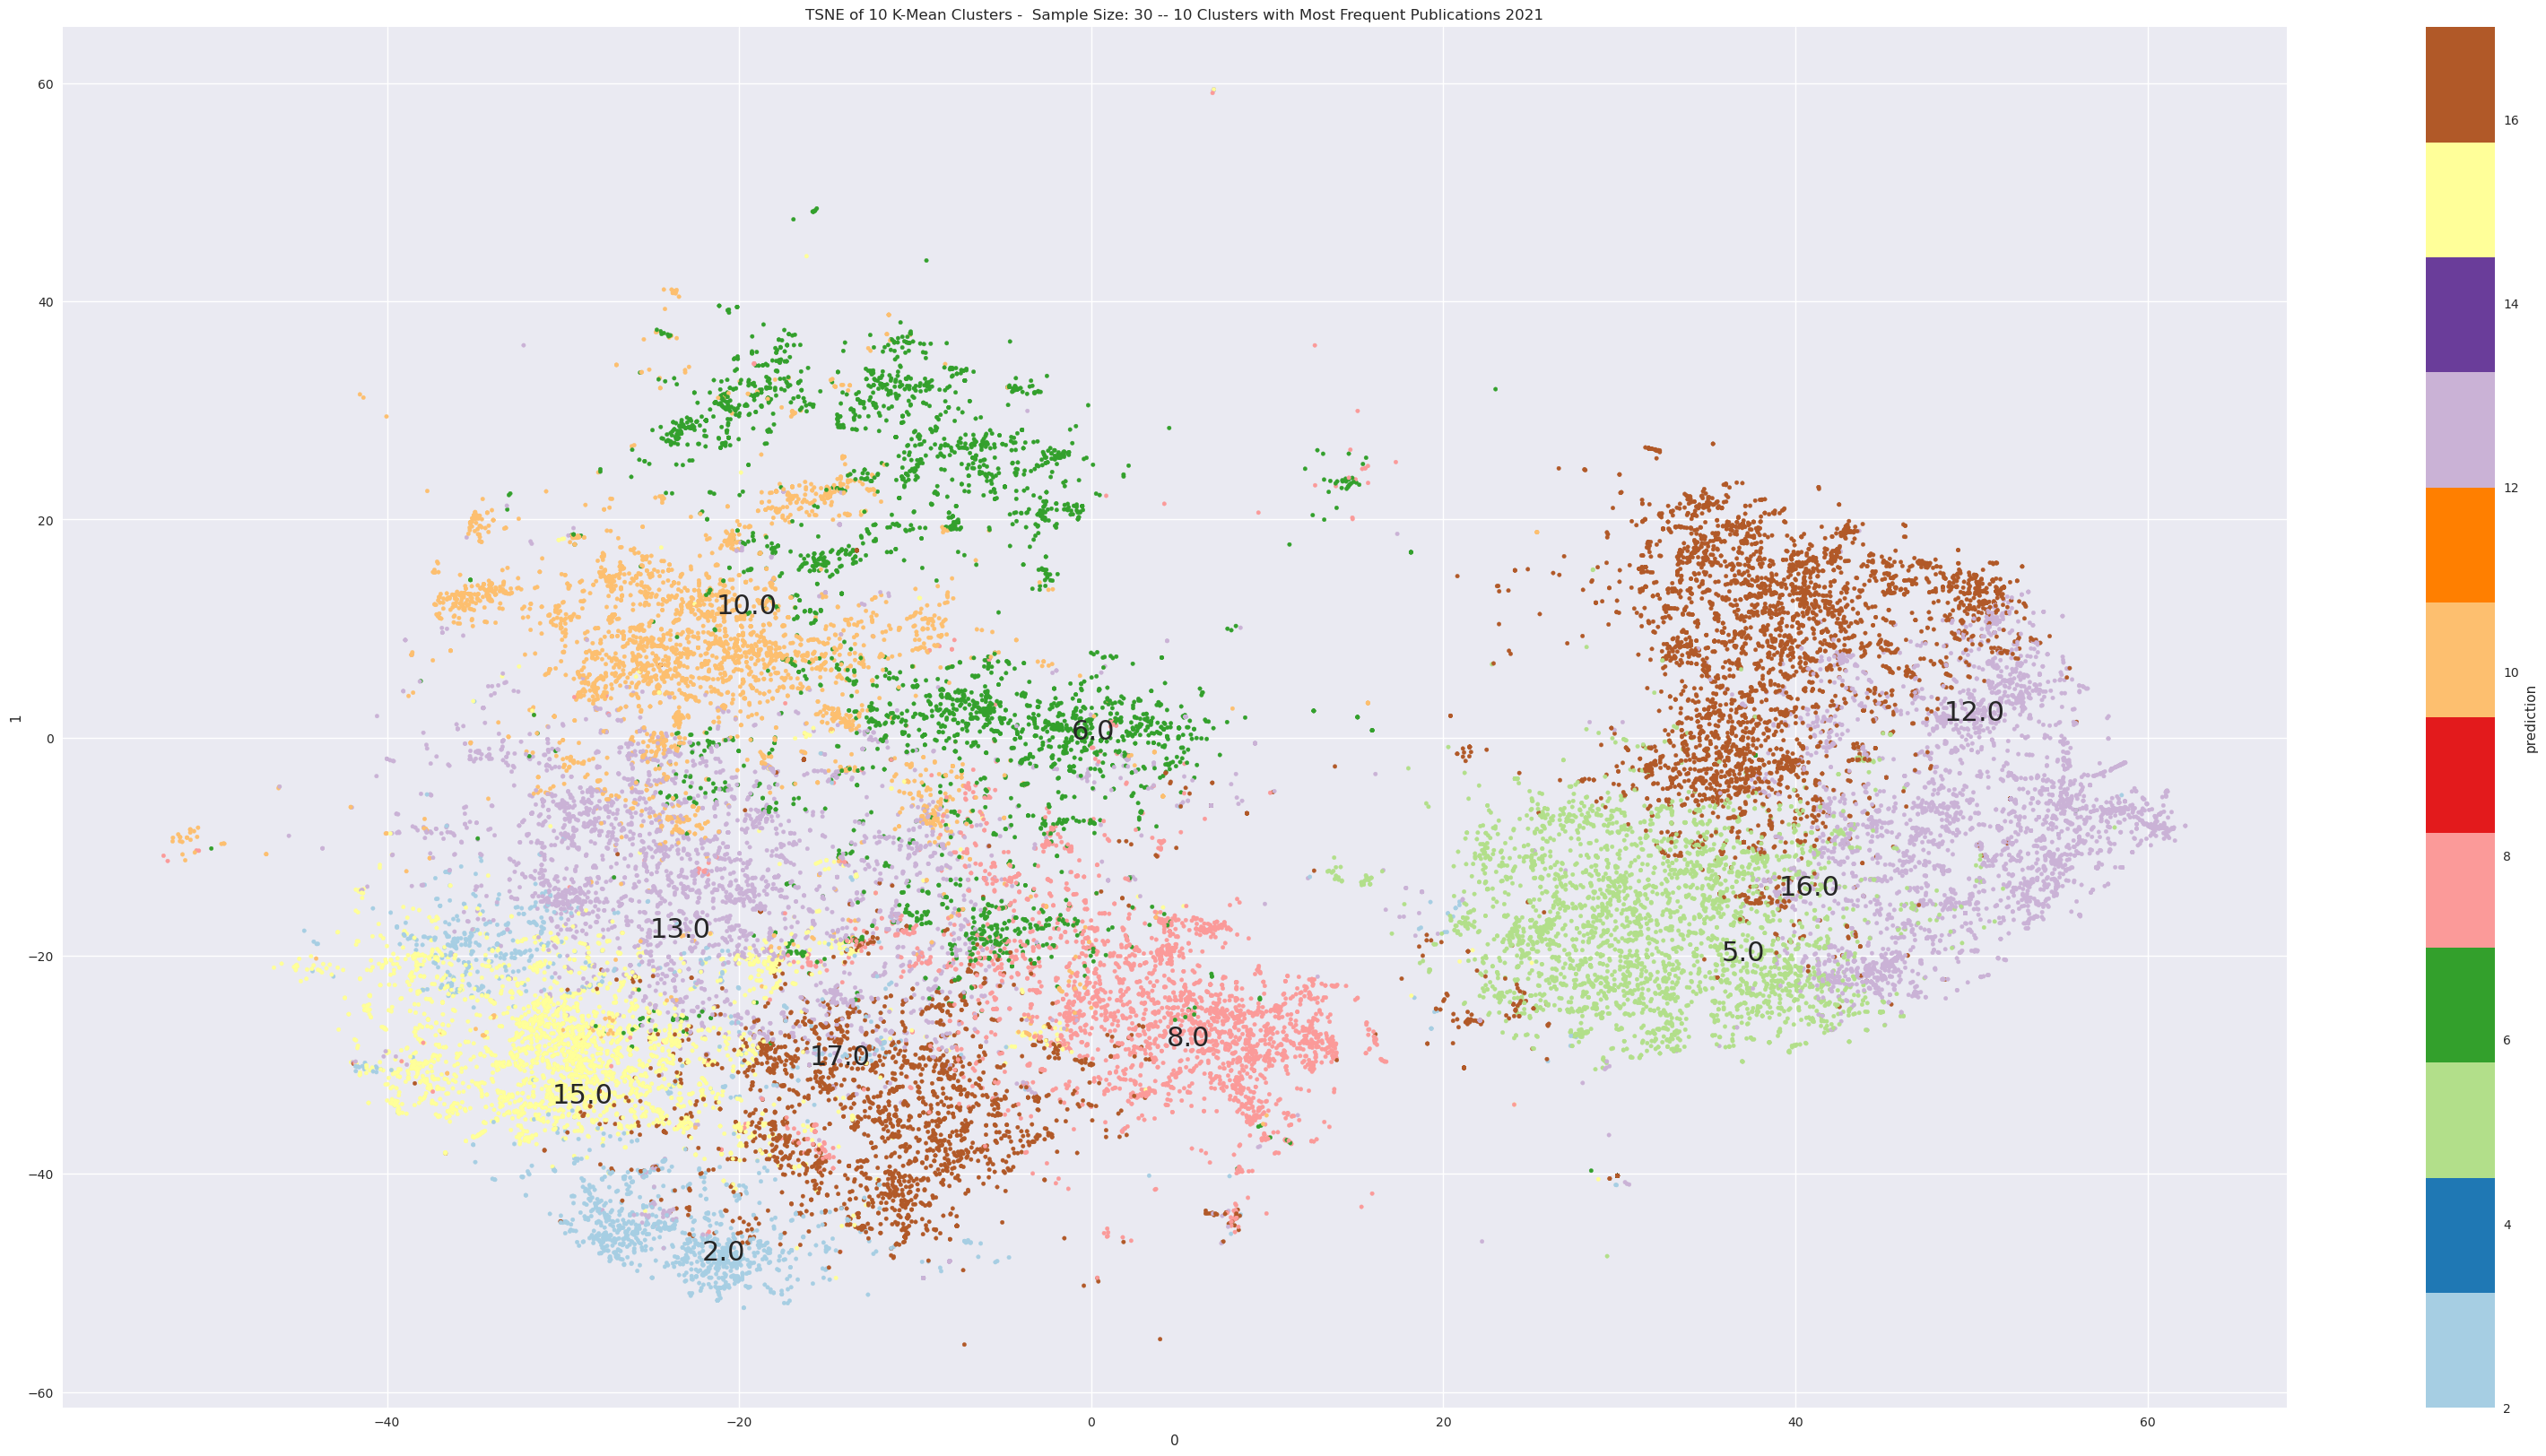

In [23]:
ax = TSNE_2d.plot.scatter(
    x='0',y='1',c='prediction', cmap='Paired',s=10,figsize=(40,20),
title = 'TSNE of {} K-Mean Clusters -  Sample Size: {} -- 10 Clusters with Most Frequent Publications 2021'.format(len(TSNE_2d.groupby('prediction').first()),
                                                               30))
for i, txt in enumerate(TSNE_2d.groupby('prediction').first().reset_index().values):
    ax.annotate(txt[0], (txt[1], txt[2]),fontsize=22)
    

plt.show()
plt.close()




#### What are the documents that make up cluster 8 like? 

In [12]:
cluster_oi = 8

In [13]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == cluster_oi).count() ## Revise sampling 

3958

In [14]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction ==  cluster_oi).distinct().count()

3735

### What are the most frequnently published journals for cluster 8?

In [17]:
sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == cluster_oi).distinct().groupBy("journal").count().sort('count',ascending=False).show()

+--------------------+-----+
|             journal|count|
+--------------------+-----+
|                null|  699|
|            PLoS One|   77|
|                2020|   62|
|                2021|   62|
|     Nutr Clin Pract|   60|
|Arab Studies Journal|   60|
|Juntendo Medical ...|   60|
|Australasian Medi...|   60|
| it is an open-ac...|   60|
| nanotechnology a...|   60|
|          Psychiatry|   60|
|        Cato Journal|   60|
| political and ci...|   60|
|       Int J Toxicol|   60|
|            JGH Open|   60|
|          J Hum Lact|   60|
|The Japanese Jour...|   60|
|"" Jasmine Rault ...|   60|
|Nationalities Papers|   60|
|   Sci Total Environ|   43|
+--------------------+-----+
only showing top 20 rows



### Pull All documents from Topic 10

In [16]:
cluster_of_interest = 8

In [18]:
sample_seed_1_cluser_assinged_metadata_DF = sample_seed_1_cluser_assinged_metadata.where(sample_seed_1_cluser_assinged_metadata.prediction == cluster_of_interest).distinct().toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


In [19]:
sample_seed_1_cluser_assinged_metadata_DF

_c0                                          EMBEDDING  \
0     bn9ni8xt  [-4.375709533691406, -4.266481399536133, -1.11...   
1     bolspgvt  [-2.038400650024414, -5.592348098754883, -4.23...   
2     brzv7z2n  [-2.582906723022461, -3.299624443054199, -1.08...   
3     dr0jv46t  [-3.9482569694519043, -4.171532154083252, -2.2...   
4     ejr0gvxp  [-5.6000871658325195, -5.906472206115723, -0.1...   
...        ...                                                ...   
3730  81xiyefn  [-4.285436630249023, -5.544196128845215, 0.762...   
3731  cq7j8m17  [-5.123210430145264, -4.566595554351807, 1.716...   
3732  d3k46tfs  [-1.7015650272369385, -4.036747455596924, 1.53...   
3733  l2pgl4n3  [-4.204632759094238, -4.09843111038208, -0.369...   
3734  q9xktyzl  [-2.8252227306365967, -3.3582634925842285, -2....   

                                           pca_features  _c0_pred  prediction  \
0     [34.14538956918501, 3.3293065643890554, -0.528...  bn9ni8xt           8   
1     [34.43916724356288, 0.33064304449106946, -4.36...  bolspgvt           8   
2     [31.405186207392603, 7.285957632779858, 11.262...  brzv7z2n           8   
3     [37.6644234848527, 7.677367072184089, -3.03021...  dr0jv46t           8   
4     [42.93499605015591, 14.032382639698904, -5.567...  ejr0gvxp           8   
...                                                 ...       ...         ...   
3730  [37.19908103850301, 11.118399657821664, 4.7674...  81xiyefn           8   
3731  [33.31004773548726, 8.924764829477668, 5.57061...  cq7j8m17           8   
3732  [33.70359961471507, 5.993926495214522, 5.83557...  d3k46tfs           8   
3733  [40.12900466736572, 3.61194521100271, -8.16758...  l2pgl4n3           8   
3734  [40.811775017962894, 18.171209695375087, -1.31...  q9xktyzl           8   

              0          1  cluster  _c0_TSNE  cord_uid  \
0      4.296191 -28.240200        8  bn9ni8xt  bn9ni8xt   
1     -8.598996 -21.362614        8  bolspgvt  bolspgvt   
2     10.953753 -34.426777        8  brzv7z2n  brzv7z2n   
3      0.436069 -21.895735        8  dr0jv46t  dr0jv46t   
4     -0.967293 -17.272612        8  ejr0gvxp  ejr0gvxp   
...         ...        ...      ...       ...       ...   
3730   1.700449 -23.775433        8  81xiyefn      None   
3731   3.675231 -27.622681        8  cq7j8m17  cq7j8m17   
3732   7.258111 -17.251871        8  d3k46tfs  d3k46tfs   
3733  -1.228138 -25.444893        8  l2pgl4n3  l2pgl4n3   
3734   7.267850 -23.991005        8  q9xktyzl  q9xktyzl   

                                                  title  \
0     COVID-19: On the quarantine duration after sho...   
1     The practice of evaluating epidemic response i...   
2     COVID-19 forecasting based on an improved inte...   
3     The impact of COVID-19 control measures on soc...   
4     Estimating the prevalence and risk of COVID-19...   
...                                                 ...   
3730                                               None   
3731  Limited containment options of COVID-19 outbre...   
3732  Remote sensing of water transparency variabili...   
3733  Link between COVID-19-related in-hospital mort...   
3734  Epidemiological analysis of asymptomatic SARS-...   

                                               abstract  \
0     A simple Monte-Carlo method will be put forwar...   
1     BACKGROUND: Epidemics of infectious disease oc...   
2     COVID-19 is a novel coronavirus that was emerg...   
3     BACKGROUND: Many low- and middle-income countr...   
4     "Coronavirus disease 2019 (COVID-19) started i...   
...                                                 ...   
3730                                               None   
3731  COVID-19 has spread from China across Europe a...   
3732  As of October 8th, 2020, the number of confirm...   
3733  OBJECTIVE: To assess the effect of a weather i...   
3734  We established an individual-based computer mo...   

                                                authors  \
0                      

In [20]:
import gensim
gensim.__version__

/home/hadoop/miniconda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


'4.0.1'

#### LSI Background 
LSI provides both positive and negative weights per topic. A positive weight means the word is highly representative of a topic, while a negative weight means the word is highly unrepresentative of a topic (the less it occurs in a text, the more likely the topic).

In [21]:
from collections import defaultdict
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim import models

In [22]:
def tfidf_model(sample_seed_1_cluser_assinged_metadata_DF):
    title_courpus = sample_seed_1_cluser_assinged_metadata_DF['title'].dropna().drop_duplicates().values
    abstract_corpus = sample_seed_1_cluser_assinged_metadata_DF['abstract'].dropna().drop_duplicates().values
    total_documents = np.concatenate((title_courpus,abstract_corpus),axis=0)
    
    print('TOTAL CORPUS SHAPE:', total_documents.shape)
    total_documents_stopwords = [remove_stopwords(i) for i in list(total_documents) ]
    
    texts = [
    [word for word in document.lower().split() ]
    for document in total_documents_stopwords
    ]

    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    tfidf = models.TfidfModel(corpus)
    
    corpus_tfidf = tfidf[corpus]
    #for doc in corpus_tfidf:
    #    print(doc)
    


    return tfidf_model, corpus_tfidf, dictionary, corpus 

def lsi_model_train(corpus_tfidf,dictionary,num_topics):
    lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
    corpus_lsi = lsi_model[corpus_tfidf]
    print('TERMS IN LSI:',lsi_model.num_terms)
    
    
    return lsi_model, corpus_lsi

def plot_lsi_terms(lsi_model_temp,num_terms_visible,figsize=(20,30),cluster=None):
    
    
    fig, axs = plt.subplots(lsi_model_temp.num_topics,figsize=figsize)
    fig.suptitle('LSI Term Weights per Topic across {} Topics across Cluster {}'.format(lsi_model_temp.num_topics,cluster))
    
    for topic_num in range(lsi_model_temp.num_topics):
        term_df = pd.DataFrame([i.replace('"','').split('*') for i in lsi_model_temp.print_topic(topic_num,topn=num_terms_visible).split('+')]).rename(columns={0:'weight',1:'term'}).set_index('term')
        term_df['weight'] = term_df['weight'].astype(float)

        #axs[topic_num] = term_df.plot.barh(title='TOPIC {}'.format(topic_num))
        if lsi_model_temp.num_topics == 1:
            term_df.sort_values('weight').plot.barh(title='TOPIC {}'.format(topic_num),ax=axs)
        else:
            term_df.sort_values('weight').plot.barh(title='TOPIC {}'.format(topic_num),ax=axs[topic_num])

    plt.show()
    plt.close()

    
    
    
    

TOTAL CORPUS SHAPE: (5070,)
TERMS IN LSI: 37249


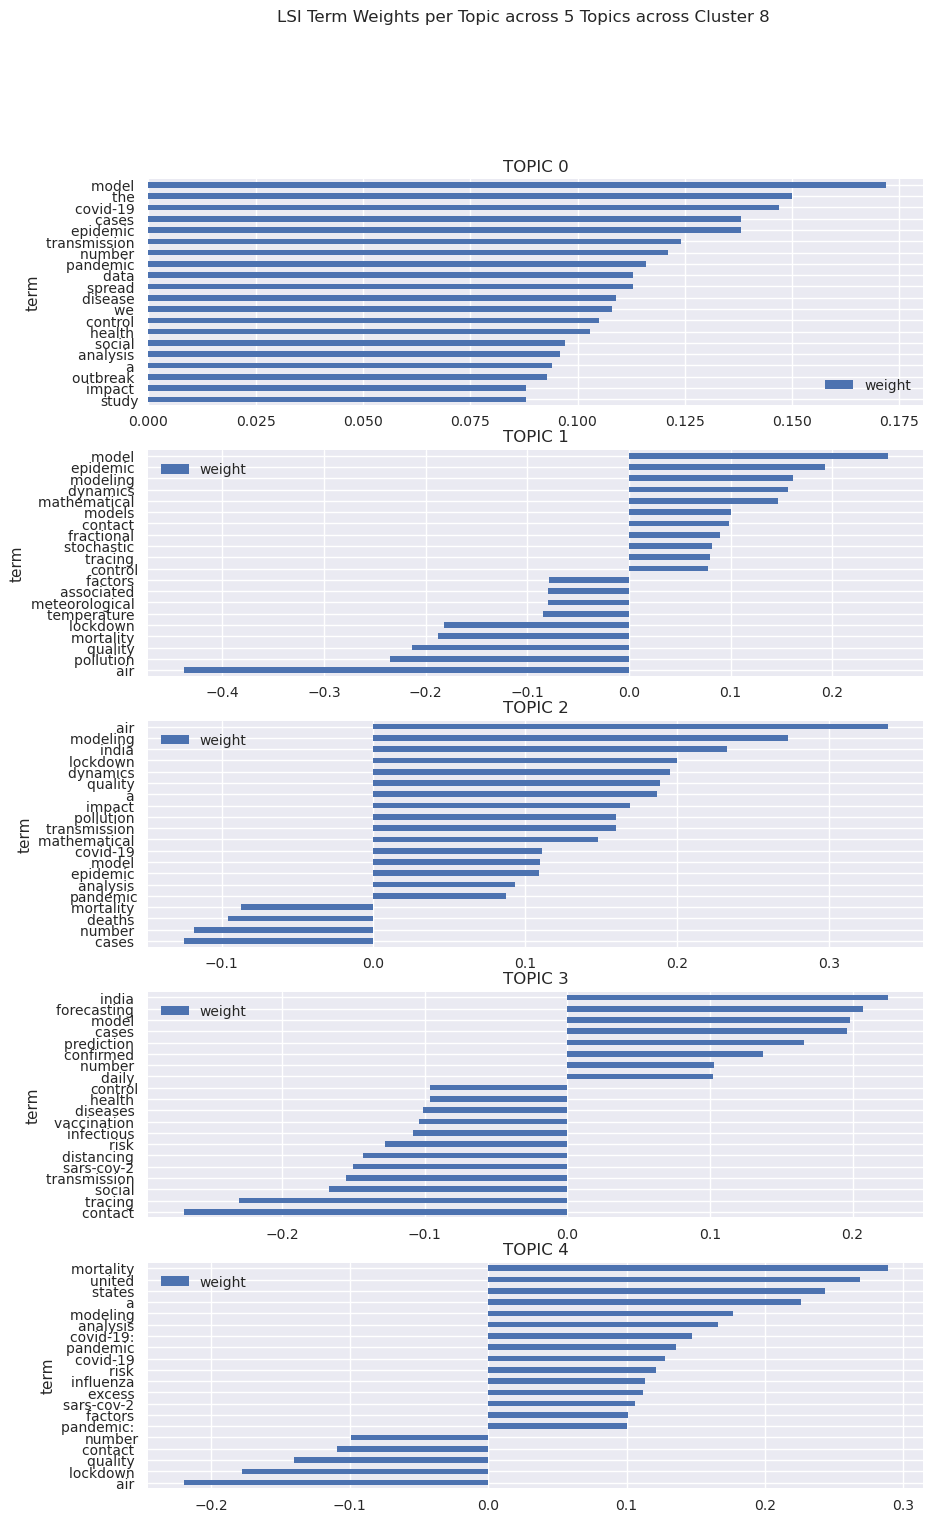

In [23]:
tfidf_model, corpus_tfidf, dictionary, corpus  = tfidf_model(sample_seed_1_cluser_assinged_metadata_DF)

lsi_model, corpus_lsi = lsi_model_train(corpus_tfidf,dictionary,num_topics= 5) 

plot_lsi_terms(lsi_model,20,figsize=(10,17),cluster=cluster_of_interest)

In [24]:
d = {dictionary.get(id): value for doc in corpus_tfidf for id, value in doc}


In [25]:
pd.DataFrame.from_dict(d,orient='index').sort_values(0,ascending=False).head(10)

0
erratum                     1.000000
unk                         1.000000
dengue:                     1.000000
arbitrage                   0.970371
urinals                     0.945014
infection-reduced-recovery  0.915607
test-trace-quarantine       0.915263
quantization                0.873501
mexico:                     0.863657
ross–macdonald              0.858835

In [28]:
pd.DataFrame.from_dict(d,orient='index').sort_values(0,ascending=False).tail(20)

0
reproduction  0.025922
disease       0.025670
we            0.025463
present       0.025424
methods:      0.025213
results:      0.025166
virus         0.024085
risk          0.023502
time          0.023251
based         0.022973
pandemic      0.021449
results       0.021189
impact        0.021024
public        0.020268
this          0.019323
transmission  0.019242
analysis      0.019144
a             0.018336
in            0.015896
covid-19      0.009221

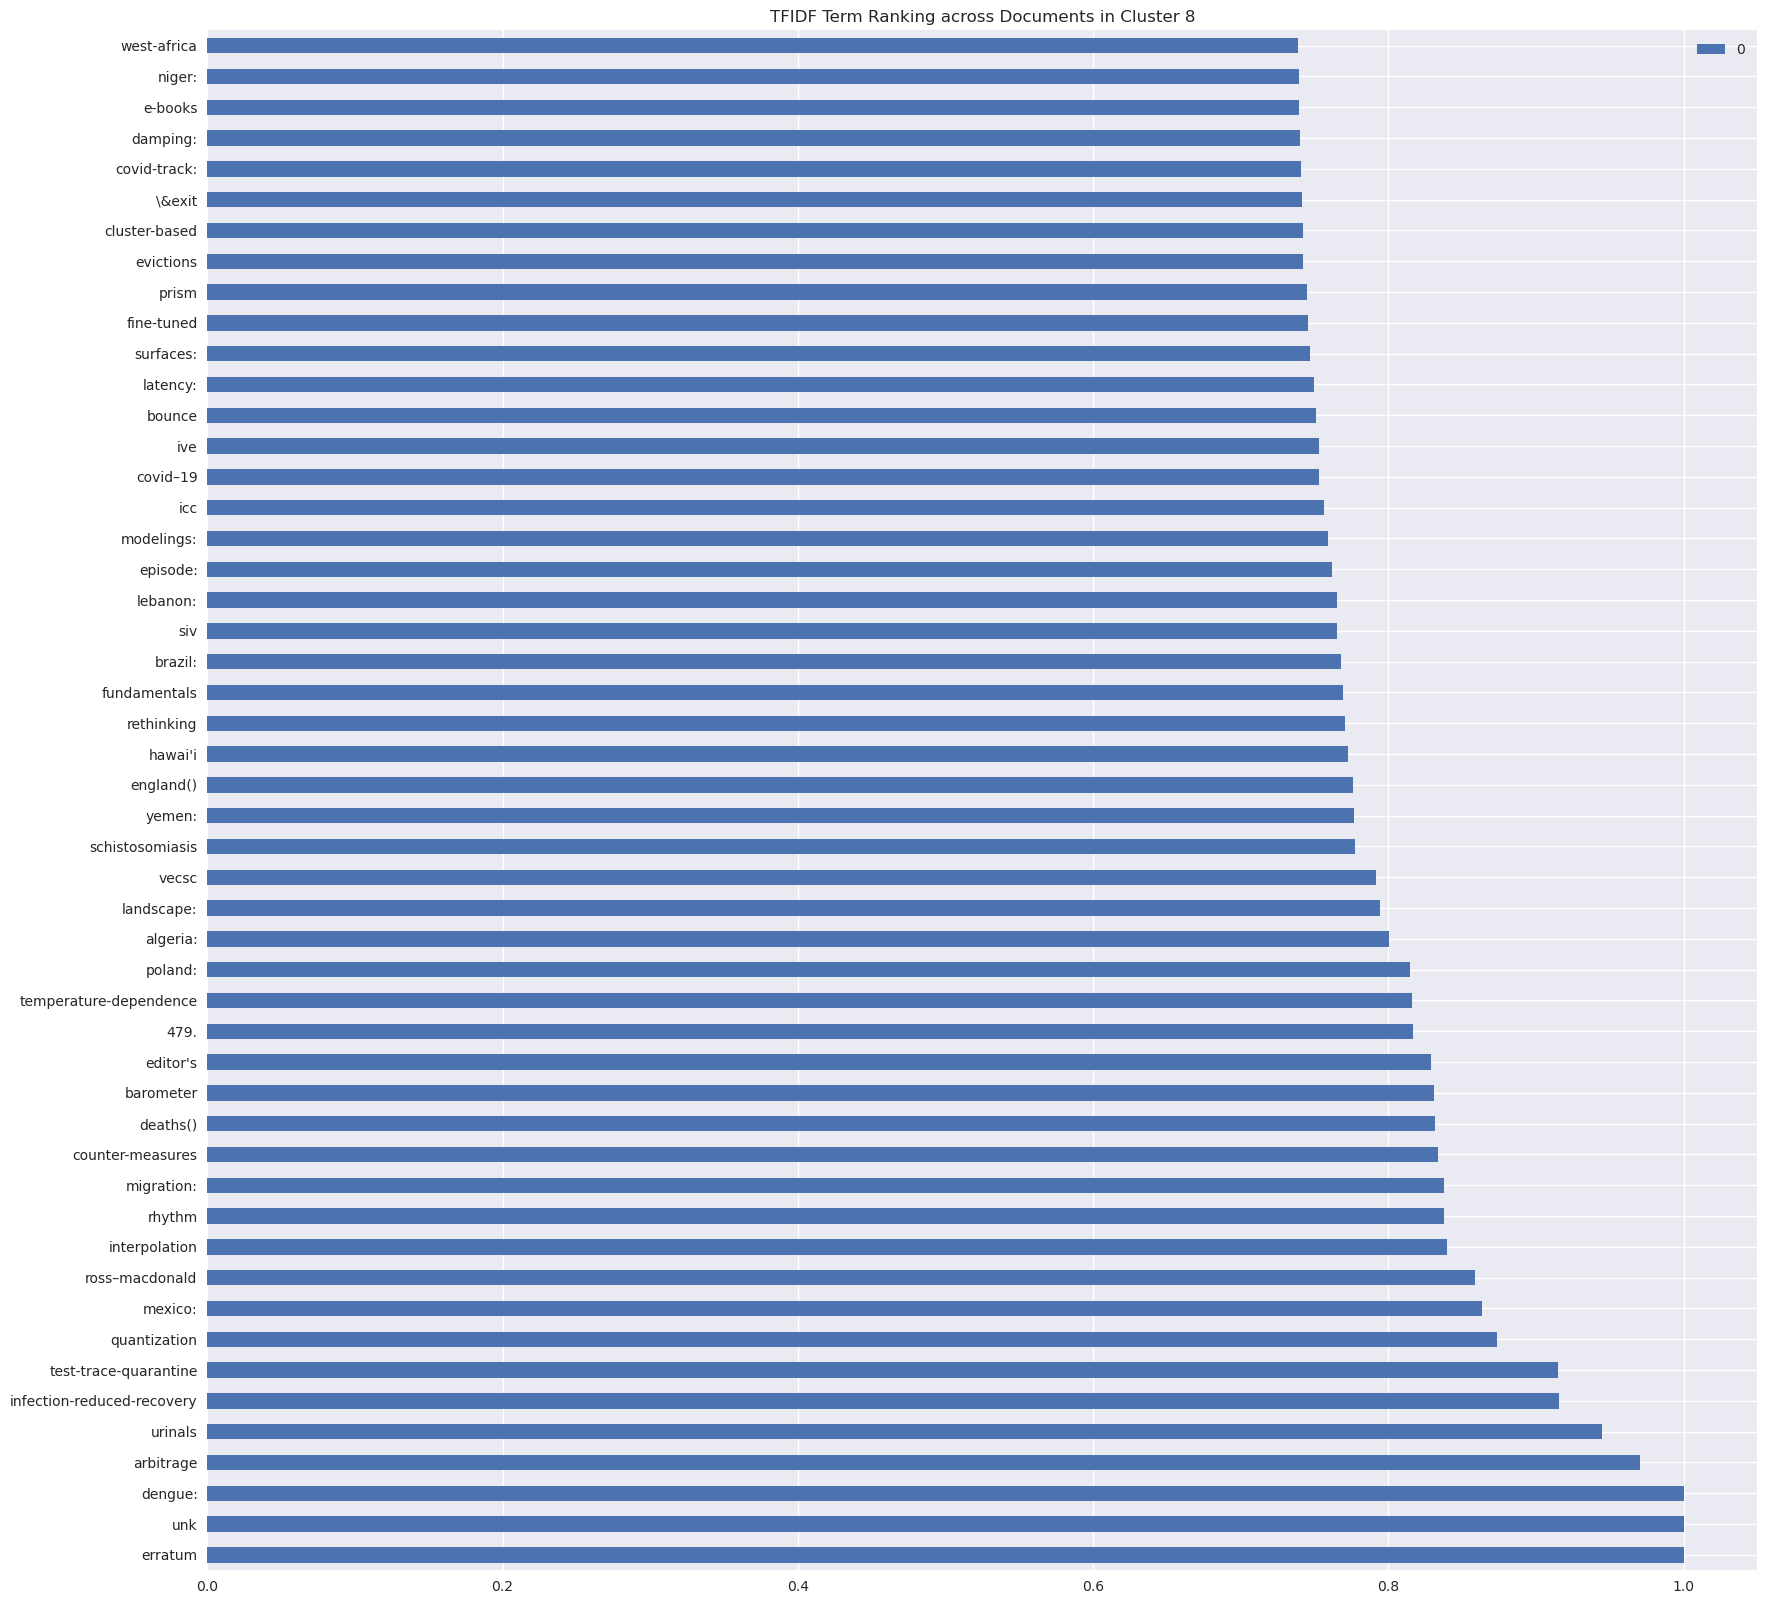

<function matplotlib.pyplot.close(fig=None)>

In [30]:
pd.DataFrame.from_dict(d,orient='index').sort_values(0,ascending=False).head(50).plot.barh(title='TFIDF Term Ranking across Documents in Cluster 8',figsize=(20,20))
plt.show()
plt.close